In [12]:
# 分析数据中是否存在异常样本
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
train_values = pd.read_csv('train_values_dummy.csv')
train_labels = pd.read_csv('train_labels.csv')
all_demo = train_values.merge(train_labels,how='inner')
all_demo.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [14]:
feature_mean_list = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','age','oldpeak_eq_st_depression']

In [15]:
for f in feature_mean_list:
#     grouped_df = all_demo.groupby('heart_disease_present')[f].aggregate(np.mean).reset_index()
    grouped_df = all_demo.groupby('heart_disease_present')[f].aggregate(np.median).reset_index()
    print(grouped_df)
    print('\n')
#     plt.figure(figsize=(8,5))
#     sns.barplot(grouped_df.heart_disease_present.values, grouped_df[f].values, alpha=0.9, color='red')
#     plt.ylabel(f, fontsize=12)
#     plt.xlabel('heart_disease_present', fontsize=12)
#     plt.xticks(rotation='vertical')
#     plt.show()

   heart_disease_present  resting_blood_pressure
0                      0                     130
1                      1                     130


   heart_disease_present  serum_cholesterol_mg_per_dl
0                      0                        237.5
1                      1                        255.5


   heart_disease_present  max_heart_rate_achieved
0                      0                      160
1                      1                      142


   heart_disease_present   age
0                      0  53.5
1                      1  58.0


   heart_disease_present  oldpeak_eq_st_depression
0                      0                      0.25
1                      1                      1.40




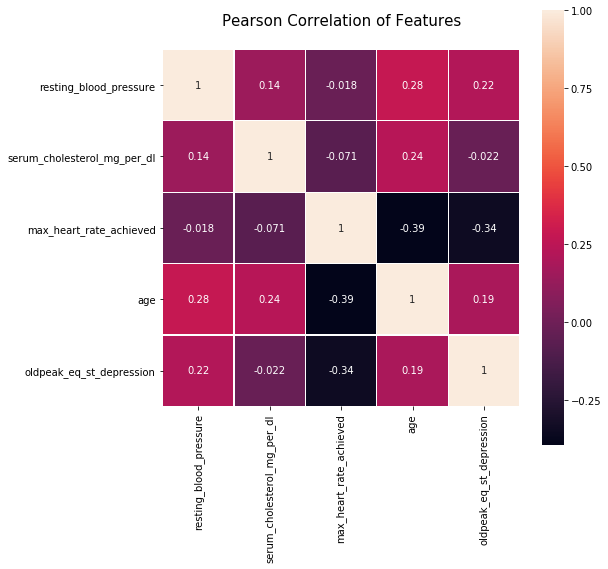

In [20]:
data = train_values[feature_mean_list][:500]

corr_list = list(np.reshape(np.array(data.astype(float).corr().values),(1,-1)))
from pyecharts.charts import HeatMap
from pyecharts import options as opts
new_matrix = list()
count = 0
for i in range(len(feature_mean_list)):
    for j in range(len(feature_mean_list)):
        temp_list =[i,j,corr_list[0][count]*100]
        count+=1
        new_matrix.append(temp_list)

(
    HeatMap()
    .add_xaxis(feature_mean_list)
    .add_yaxis("series0", feature_mean_list, new_matrix)
    .set_global_opts(
            title_opts=opts.TitleOpts(title="HeatMap-corr"),
            visualmap_opts=opts.VisualMapOpts(),)
    .render_notebook()   
)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

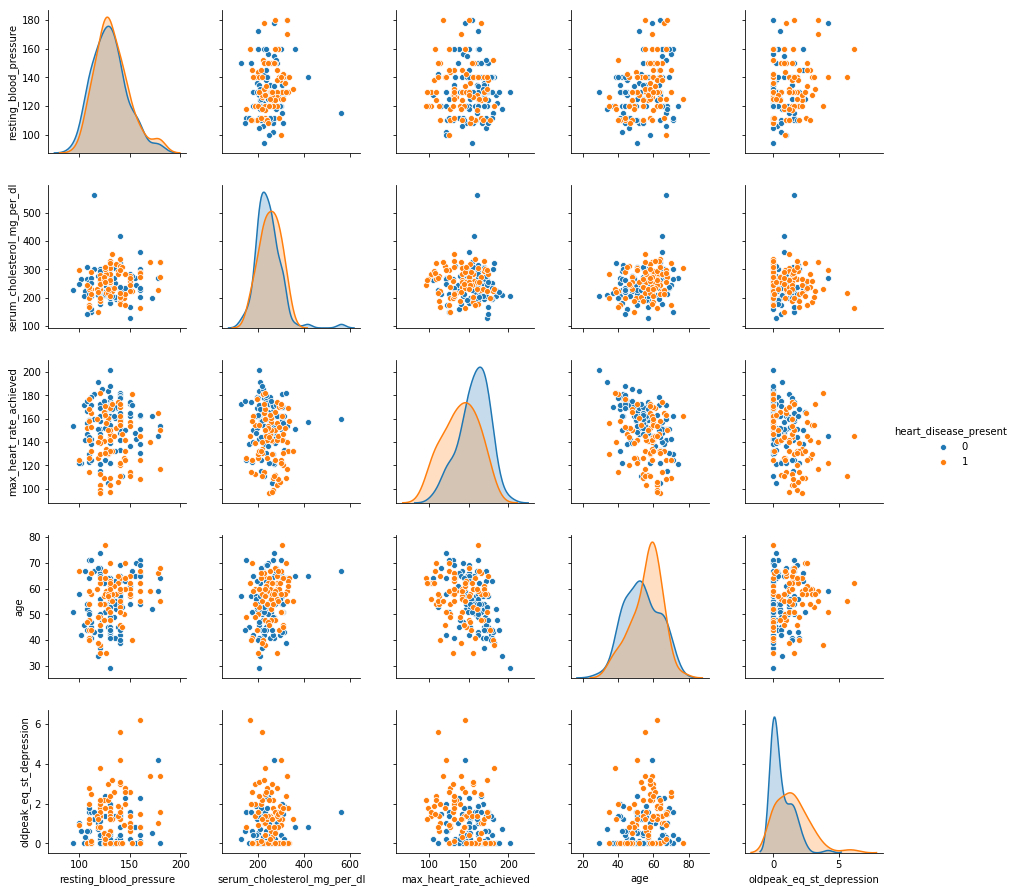

In [27]:
temp_train_values = train_values.drop(columns=['patient_id'])
sns.pairplot(temp_train_values.join(train_labels), hue='heart_disease_present',vars=feature_mean_list)